In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#loading the dataset
dataset = pd.read_csv("/content/drive/MyDrive/CSB-Karaca-dataset/ACE2_RBD_benchmarking_dataset.csv")

#dataset.head()

In [ ]:
#returns the experimental values of a given protein
def get_expbind(protein):
  result = []
  for i in range(len(dataset)):
    if dataset['protein'][i] == protein:
      result.append(dataset['exp_binding'][i])
  return result

In [ ]:
def remove_ddg_zero(predictor):
  prediction = predictor +'_ddg'
  succ_rate = predictor +'_succ_rate'
  return [0 if dataset[prediction][i] == 0 else dataset[succ_rate][i]  for i in range(len(dataset))]


In [ ]:
#experimental ddgs of ACE2 and RBD
ace2_exp = get_expbind('ACE2')
rbd_exp = get_expbind('RBD')

#success rates of predictors, ddg=0 cases tagged as failed
haddock_succ = remove_ddg_zero('HADDOCK')
foldx_succ = remove_ddg_zero('FoldX')
foldxwater_succ = remove_ddg_zero('FoldXwater')
evoef_succ = remove_ddg_zero('EvoEF1')
mutabind_succ = remove_ddg_zero('MutaBind2')
ssipe_succ = remove_ddg_zero('SSIPe')

#new success rates, ddg=0 cases eliminated
print(sum(foldx_succ)/len(foldx_succ))
print(sum(evoef_succ)/len(evoef_succ))

0.6387832699619772
0.5741444866920152


#Histograms and scatter plots

In [ ]:
def histogram(data, title):
  fig, ax = plt.subplots(figsize =(10, 7))
  ax.hist(data, bins = 50)
  plt.title(title)
  plt.show()

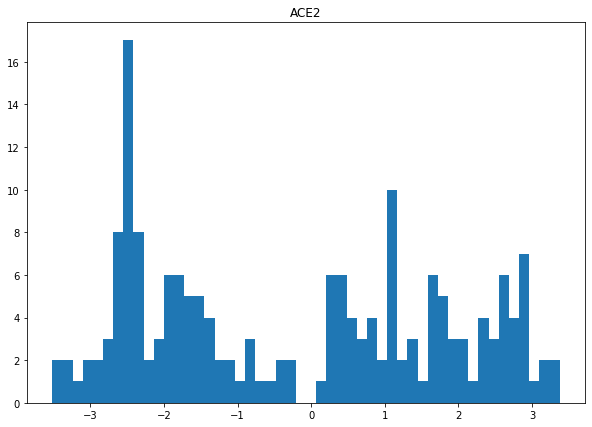

In [ ]:
histogram(ace2_exp, 'ACE2')

In [ ]:
#histogram(rbd_exp, 'RBD')

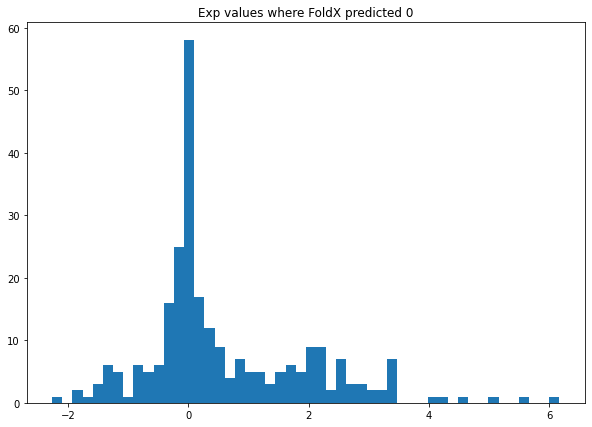

In [ ]:
histogram(dataset['FoldX_ddg'], 'Exp values where FoldX predicted 0')

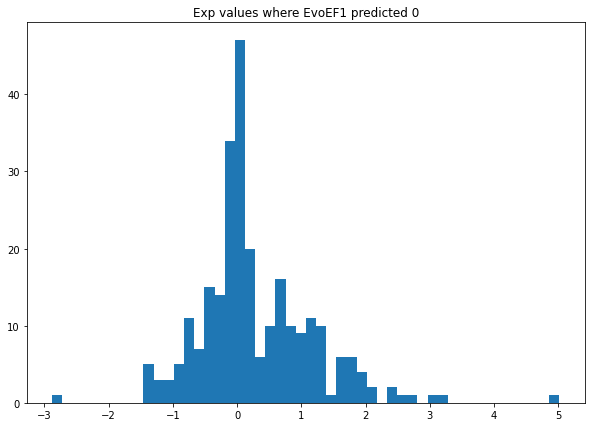

In [ ]:
histogram(dataset['EvoEF1_ddg'], 'Exp values where EvoEF1 predicted 0')

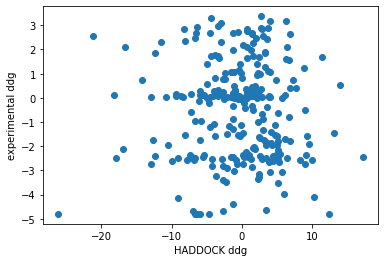

In [ ]:
plt.xlabel('HADDOCK ddg')
plt.ylabel('experimental ddg')
plt.scatter(dataset['HADDOCK_ddg'],dataset['exp_binding'])

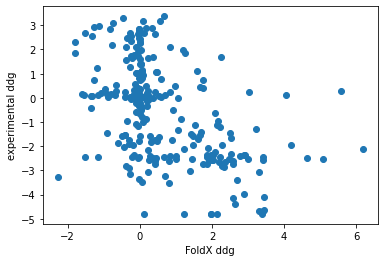

In [ ]:
plt.xlabel('FoldX ddg')
plt.ylabel('experimental ddg')
plt.scatter(dataset['FoldX_ddg'],dataset['exp_binding'])


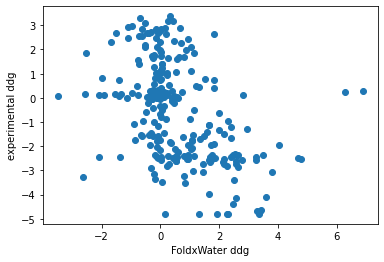

In [ ]:
plt.xlabel('FoldxWater ddg')
plt.ylabel('experimental ddg')
plt.scatter(dataset['FoldXwater_ddg'],dataset['exp_binding'])

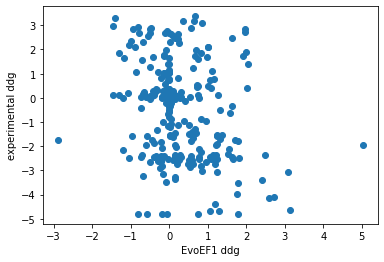

In [ ]:
plt.xlabel('EvoEF1 ddg')
plt.ylabel('experimental ddg')
plt.scatter(dataset['EvoEF1_ddg'],dataset['exp_binding'])

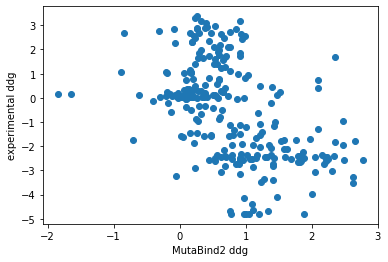

In [ ]:
plt.xlabel('MutaBind2 ddg')
plt.ylabel('experimental ddg')
plt.scatter(dataset['MutaBind2_ddg'],dataset['exp_binding'])

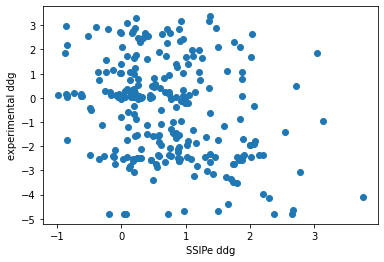

In [ ]:
plt.xlabel('SSIPe ddg')
plt.ylabel('experimental ddg')
plt.scatter(dataset['SSIPe_ddg'],dataset['exp_binding'])

#extreme case success rates

In [ ]:
#extracting extreme experimental cases 
def get_extreme_indices():
  ace2 = []
  rbd = []

  for i in range(len(dataset)):
    if dataset['protein'][i] == 'ACE2':
        if dataset['exp_binding'][i] >=3 or dataset['exp_binding'][i] <= -3:
            ace2.append(i)

    if dataset['protein'][i] == 'RBD':
        if dataset['exp_binding'][i] <= -4:
            rbd.append(i)
  
  return ace2, rbd

In [ ]:
def success_rate_at_indices(indices, succ_rate):
  result = []

  for i in indices:
    result.append(succ_rate[i])
  
  return sum(result)/len(result)

In [ ]:
ace2_extr_ind, rbd_extr_ind = get_extreme_indices()
print(rbd_extr_ind)
print(ace2_extr_ind)
print(ace2_extr_ind + rbd_extr_ind)

#to check RBD extreme cases
#dataset[75:83]


[75, 76, 77, 78, 79, 80, 81, 82, 243, 249, 252, 254]
[8, 15, 45, 47, 68, 83, 116, 117, 118, 132, 147, 235]
[8, 15, 45, 47, 68, 83, 116, 117, 118, 132, 147, 235, 75, 76, 77, 78, 79, 80, 81, 82, 243, 249, 252, 254]


In [ ]:
dataset[243:255]

,#case_id,protein,mutation_type,exp_binding,HADDOCK_ddg,HADDOCK_succ_rate,FoldX_ddg,FoldX_succ_rate,FoldXwater_ddg,FoldXwater_succ_rate,EvoEF1_ddg,EvoEF1_succ_rate,MutaBind2_ddg,MutaBind2_succ_rate,SSIPe_ddg,SSIPe_succ_rate,volume_change,hydrophobicity_change,flexibility,physicochem_class_change
243,Y453P,RBD,MD,-4.80,-5.8953,0,0.12,1,0.14,1,-0.05,0,0.78,1,2.653,1,-0.38360,-0.14,-1,polarity_loss
244,Y473D,RBD,MD,-2.72,-0.6499,0,0.41,1,0.28,1,0.20,1,0.90,1,1.751,1,-0.40099,-1.16,0,charge_gain
245,Y473K,RBD,MD,-2.59,-6.7618,0,0.26,1,0.01,1,0.10,1,0.45,1,1.876,1,-0.15787,-1.76,78,charge_gain
246,Y489A,RBD,RD,-2.46,17.2054,1,1.86,1,1.70,1,1.64,1,2.23,1,2.017,1,-0.55448,0.36,-2,polarity_loss
247,Y489E,RBD,MD,-3.98,6.0580,1,2.88,1,1.64,1,1.75,1,2.00,1,2.208,1,-0.28313,-1.00,6,charge_gain
248,Y489F,RBD,RD,-0.95,-5.7872,0,-0.35,0,-0.58,0,0.38,1,0.28,1,0.925,1,-0.05852,0.93,0,polarity_loss
249,Y489S,RBD,MD,-4.80,12.4168,1,1.23,1,1.32,1,1.78,1,1.89,1,2.374,1,-0.51946,-0.44,0,no_change
250,Y505C,RBD,RD,-2.36,4.9318,1,2.88,1,3.48,1,2.48,1,0.80,1,2.202,1,-0.46243,0.03,0,polarity_loss
251,Y505D,RBD,MD,-3.07,4.0305,1,3.29,1,3.81,1,3.08,1,2.05,1,2.784,1,-0.40099,-1.16,0,charge_gain
252,Y505G,RBD,MD,-4.65,3.5127,1,3.45,1,3.43,1,3.14,1,1.11,1,2.668,1,-0.60871,0.22,-2,polarity_loss


In [ ]:
def print_extreme_case_succ(succ_rate, predictor):
  print(predictor, ' ACE2 extreme: ', success_rate_at_indices(ace2_extr_ind, succ_rate))
  print(predictor,' RBD extreme: ', success_rate_at_indices(rbd_extr_ind, succ_rate))
  print(predictor, ' total extreme: ', success_rate_at_indices(ace2_extr_ind + rbd_extr_ind, succ_rate))
  print()

In [ ]:
#HADDOCK extreme cases success rates
print_extreme_case_succ(haddock_succ, 'HADDOCK')

#FoldX extreme cases success rates
print_extreme_case_succ(foldx_succ, 'FoldX')

#FoldXwater extreme cases success rates
print_extreme_case_succ(foldxwater_succ, 'FoldXwater')

#EvoEF1 extreme cases success rates
print_extreme_case_succ(evoef_succ, 'EvoEF1')

#MutaBind2 extreme cases success rates
print_extreme_case_succ(mutabind_succ, 'MutaBind2')

#SSIPe extreme cases success rates
print_extreme_case_succ(ssipe_succ, 'SSIPe')

HADDOCK  ACE2 extreme:  0.5
HADDOCK  RBD extreme:  0.25
HADDOCK  total extreme:  0.375

FoldX  ACE2 extreme:  0.5833333333333334
FoldX  RBD extreme:  1.0
FoldX  total extreme:  0.7916666666666666

FoldXwater  ACE2 extreme:  0.5833333333333334
FoldXwater  RBD extreme:  1.0
FoldXwater  total extreme:  0.7916666666666666

EvoEF1  ACE2 extreme:  0.5833333333333334
EvoEF1  RBD extreme:  0.6666666666666666
EvoEF1  total extreme:  0.625

MutaBind2  ACE2 extreme:  0.5
MutaBind2  RBD extreme:  1.0
MutaBind2  total extreme:  0.75

SSIPe  ACE2 extreme:  0.5833333333333334
SSIPe  RBD extreme:  0.9166666666666666
SSIPe  total extreme:  0.75



#unused

In [ ]:
def neg_pos(exp):
  neg, pos = [], []
  for i in range(len(exp)):
      if np.sign(exp[i]) == 1:
          pos.append(exp[i])
      
      if np.sign(exp[i]) == -1:
          neg.append(exp[i])
  
  return neg, pos

In [ ]:
#checks if there is a case where experimental value is 0
def is_there_zero():
  for i in range(len(dataset)):
    if dataset['protein'][i] == 'RBD':
      if dataset['exp_binding'][i] == 0:
        print('there is')

In [ ]:
neg_ace2, pos_ace2 = neg_pos(ace2_exp)
print(np.min(pos_ace2))
print(pos_ace2[0])
print(np.sign(pos_ace2[0]))
print(np.max(neg_ace2))

neg_rbd, pos_rbd = neg_pos(rbd_exp)
print(np.max(neg_rbd))
print(np.min(pos_rbd))


0.20457999999999998
1.6515900000000001
1.0
-0.211522
-0.02
0.01


In [ ]:
#returns indices wheree predictor guessed ddg = 0
def exp_of_predicted_zero(predictor):
  result, indices = [], []
  predictor = predictor +'_ddg'
  for i in range(len(dataset)):
    if dataset[predictor][i] == 0:
      indices.append(i)
      result.append(dataset['exp_binding'][i])
  return result, indices

In [ ]:
#the experimental values where predictors guessed ddg=0, and mutation indices in dataset
exp_foldx_zero, foldx_zero_indices = exp_of_predicted_zero('FoldX')
exp_evoef_zero, evoef_zero_indices = exp_of_predicted_zero('EvoEF1')


In [ ]:
#histogram(exp_foldx_zero, 'FoldX')

In [ ]:
#histogram(exp_evoef_zero, 'EvoEF1')